In [17]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([0.0, 1.0, 2.0])
y = np.array([3.0, 3.5, 5.5])
W = 0 # 기울기
b = 0 # 절편

lrate = 0.1 # 학습률
epochs = 1000 # 반복 횟수
n = float(len(X)) # 입력 데이터의 개수
# 경사 하강법
for i in range(epochs):
    y_pred = W*X + b # 예측값 np.array([0, 0, 0]) 으로 나옴
    dW = (2/n) * sum(X * (y_pred-y)) # 기울기에 대한 편미분
    db = (2/n) * sum(y_pred-y)       # 절편에 대한 편미분
    W = W - lrate * dW # 기울기 수정
    b = b - lrate * db # 절편 수정
    # 기울기와 절편을 출력한다.
    print (W,b)

0.9666666666666667 0.8
1.451111111111111 1.2466666666666668
1.6847407407407406 1.5071111111111113
1.788404938271605 1.6687407407407409
1.8251884773662552 1.7773116049382718
1.8279966639231824 1.8568115884773664
1.8139687915866485 1.9198499379972567
1.7920092067916478 1.9730861920804756
1.7667222327783367 2.0200671123060507
1.740468066057681 2.062709243289173
1.714436862047286 2.1020737814198025
1.6892098184142301 2.1387716527263847
1.66505221506421 2.173175358498262
1.642066405009821 2.2055298437857673
1.6202716345827273 2.2360105940266495
1.599645637583155 2.264754148304774
1.5801462620611484 2.2918741911271883
1.561722669815328 2.317470100489521
1.5443210931123144 2.341631546428551
1.527887752789166 2.364441018520378
1.5123702981553684 2.385975264258469
1.4977184792518852 2.4063061517757016
1.4838844224794496 2.4255012255701844
1.470822703205596 2.4436240959602578
1.4584903162783458 2.460734736127087
1.4468465969601465 2.476889725646
1.4358531195108977 2.4921424611247707
1.4254735874

1.250000000000002 2.749999999999997


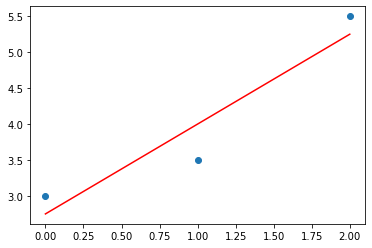

In [12]:
# 예측값을 만든다.
y_pred = W*X + b
# 입력 데이터를 그래프 상에 찍는다.
plt.scatter(X, y)
# 예측값은 선그래프로 그린다.
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()

# SikitLearn 선형회귀

In [19]:
import matplotlib.pylab as plt
from sklearn import linear_model

# 선형 회귀 모델을 생성한다.
reg = linear_model.LinearRegression()

# 데이터는 파이썬의 리스트로 만들어도 되고 아니면 넘파이의 배열로 만들어도 됨
X = [[0], [1], [2]] # 2차원으로 만들어야 함
y = [3, 3.5, 5.5] # y = x + 3

# 학습을 시킨다.
reg.fit(X, y)

LinearRegression()

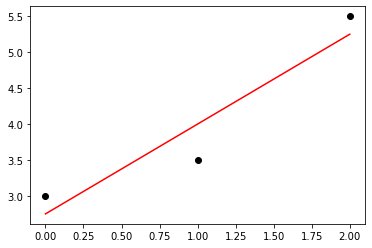

In [21]:
plt.scatter(X, y, color ='black')
y_pred = reg.predict(X)
plt.plot(X, y_pred, color = 'red')
plt.show()

## 선형회귀 실습

In [25]:
import matplotlib.pylab as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()
X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]
reg.fit(X, y) # 학습

pred = reg.predict([[165]])
print(pred)

[67.30998637]


In [28]:
y_pred = reg.predict(X)

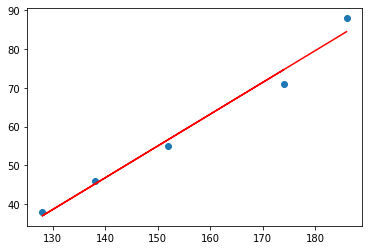

In [32]:
plt.scatter(X,y)
plt.plot(X,y_pred, color='red')
plt.show()

## 당뇨 데이터

In [34]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets

# 당뇨병 데이터 세트를 적재한다.
diabetes = datasets.load_diabetes()
# 학습 데이터와 테스트 데이터를 분리한다.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
test_size=0.2, random_state=0)
# 선형 회귀 모델로 학습을 수행한다.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
diabetes.target_filename

'diabetes_target.csv.gz'

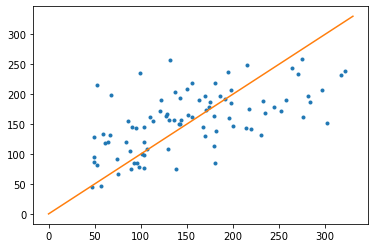

In [35]:
# 테스트 데이터로 예측해보자.
y_pred = model.predict(X_test)
# 실제 데이터와 예측 데이터를 비교해보자.
plt.plot(y_test, y_pred, '.')
# 직선을 그리기 위하여 완벽한 선형 데이터를 생성한다.
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

* 위 그래프는 X가 실제값, Y가 예측값임
* 그리고 linespace는 둘이 실제로 얼마나 차이가 있는지 보여주는 장치일 뿐임

정확도 확인

In [50]:
from sklearn.metrics import r2_score

In [53]:
pred = model.predict(X_test)

r2_score(y_test, pred)

0.33222203269065176

### OLS 보기

In [55]:
import statsmodels.api as sm
from scipy import stats

X = diabetes.data
y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           3.83e-62
Time:                        10:54:31   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

In [56]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']